# Test Grid Generation (v2)

In [105]:
%matplotlib inline

In [98]:
import grid_m82 as gm82

In [101]:
# Load param for biconical
reload(gm82)
param=gm82.init_param(ngrid=100)
param['flag_density'] = 1
param['flag_wind'] = 1
param['title'] = 'bicon_test'
param['rw_inner'] = 1.            #; Inner boundary of the wind (kpc)
param['rw_outer'] = 20.            #; Outer boundary of the wind (kpc)
param['box_size'] = param['rw_outer'] * 2
param['dl'] = param['box_size'] / param['ngrid']
param['n0'] =  0.1           # Density at inner radius (Hydrogen; cm^-3)
param['theta_min'] =  45.    # Opening angle of the cone (deg)
param['v_wind'] = 50.       # Parameterization of the wind speed (radial; km/s)
param['rg_outer'] = 0.2      # Outer boundary of galaxy (kpc)
param['density_pow'] = -2.

In [102]:
# Generate grid
# main call
out_arrays = gm82.main(param,out_root='tst_biconical')

Done making cells
Done with radius
Done with density
Done with velocity
Wrote: tst_biconical.fits
Wrote tst_biconical.asc


/Users/xavier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


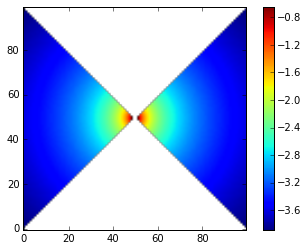

In [107]:
# Chk output
tst=True
if tst:
    rho_grid = out_arrays[0]
    emiss = out_arrays[5]
    plt.clf()
    plt.imshow(np.log10(rho_grid[:,50,:]),origin='lower')
    #plt.imshow(emiss[:,101,:],origin='lower')
    plt.colorbar()
    plt.show()

In [59]:
# Radii
reload(gridb)
r_center, r_corners = gridb.set_radii(param, cell_center, corners)

In [73]:
# Density
reload(gridb)
rho_grid = gridb.set_density(param, flag=1)

In [74]:
# Check density
plt.clf()
#plt.imshow(theta[:,25,:],origin='lower')
plt.imshow(rho_grid[:,25,:],origin='lower')
plt.colorbar()
plt.show()

In [85]:
# Velocity
reload(gridb)
vxyz_grid = gridb.set_velocity(param, flg_wind=0, cell_center=cell_center, r_center=r_center)

In [ ]:
# Check velocity
plt.clf()
plt.imshow(vxyz_grid[0][:,25,:],origin='lower')
plt.colorbar()
plt.show()

In [95]:
# Emissivity
reload(gridb)
emiss = gridb.set_emiss(param,r_corners=r_corners)

In [96]:
# Check emissivity
plt.clf()
plt.imshow(emiss[:,25,:],origin='lower')
plt.colorbar()
plt.show()

In [93]:
r_corners[25,25,25,:]

array([ 0.8       ,  1.13137085,  0.        ,  0.8       ,  1.13137085,
        1.38564065,  0.8       ,  1.13137085])